Found 2152 files belonging to 3 classes.
Class names: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,452,611 (13.17 MB)

 Trainable params: 3,452,611 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 531ms/step - accuracy: 0.6784 - loss: 0.8895 - val_accuracy: 0.8542 - val_loss: 0.5011
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 525ms/step - accuracy: 0.8615 - loss: 0.4724 - val_accuracy: 0.9062 - val_loss: 0.3606
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 526ms/step - accuracy: 0.9167 - loss: 0.3338 - val_accuracy: 0.9375 - val_loss: 0.2398
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 525ms/step - accuracy: 0.9237 - loss: 0.2987 - val_accuracy: 0.9271 - val_loss: 0.2718
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 525ms/step - accuracy: 0.9284 - loss: 0.2515 - val_accuracy: 0.9844 - val_loss: 0.1303
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 525ms/step - accuracy: 0.9466 - loss: 0.2149 - val_accuracy: 0.9375 - val_loss: 0.2216
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 526ms/step - accuracy: 0.9654 - loss: 0.1641 - val_accuracy: 0.9896 - val_loss: 0.1215
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 536ms/step - accuracy: 0.9601 - loss: 0.1583 - val_accu

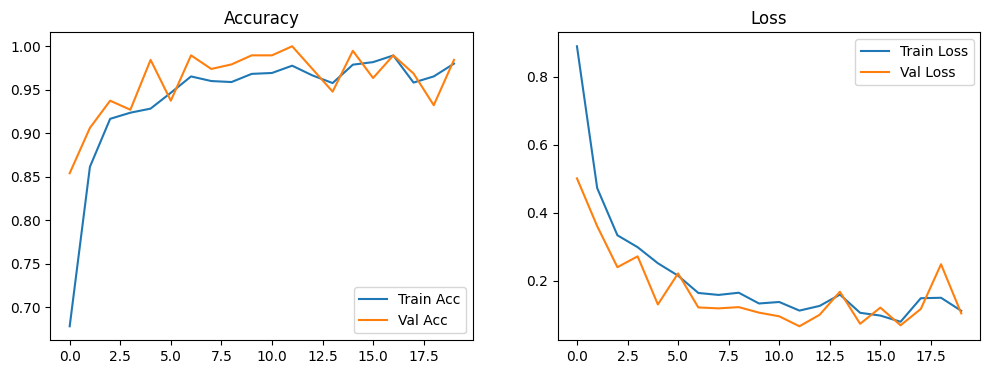

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.9883 - loss: 0.0871

Test Accuracy: 98.83%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


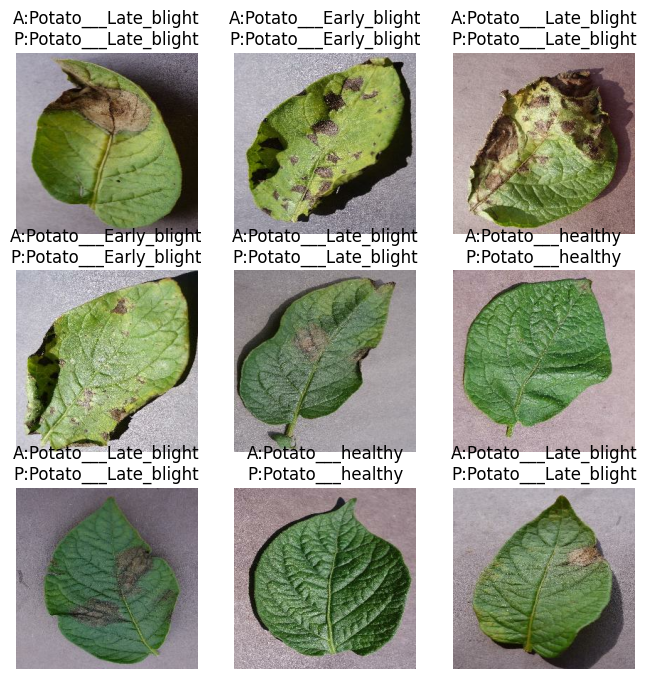

Saved model to: potato_model.h5
Saved metadata.pkl



In [ ]:
# IMPORT PACKAGES
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers


# SAFE GPU SETUP
try:
    gpus = tf.config.list_physical_devices("GPU")
    if gpus:
        tf.config.set_visible_devices(gpus[0], "GPU")
        tf.config.experimental.set_memory_growth(gpus[0], True)
except:
    pass


# CONFIGURATION
DATASET_DIR = r"C:\Users\ACER\Desktop\Potato Leaf Disease Classification using Deep Learning\PlantVillage"

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

# LOAD DATASET
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIR,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

class_names = dataset.class_names
print("Class names:", class_names)
N_CLASSES = len(class_names)


# DATASET SPLIT
ds_size = tf.data.experimental.cardinality(dataset).numpy()

train_size = int(0.8 * ds_size)
val_size = int(0.1 * ds_size)
test_size = ds_size - train_size - val_size

dataset = dataset.shuffle(1000, seed=42)

train_ds = dataset.take(train_size)
rest = dataset.skip(train_size)
val_ds = rest.take(val_size)
test_ds = rest.skip(val_size)


# PREFETCH + RESCALE
rescale = layers.Rescaling(1.0 / 255)

def preprocess(imgs, labels):
    return rescale(imgs), labels

train_ds = train_ds.map(preprocess).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).prefetch(tf.data.AUTOTUNE)


# BUILD MODEL
model = models.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),

    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(N_CLASSES, activation="softmax")
])

model.summary()

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


# TRAIN MODEL
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1
)


# PLOTS
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


# EVALUATE
loss, acc = model.evaluate(test_ds)
print(f"\nTest Accuracy: {acc*100:.2f}%")


# SAMPLE PREDICTIONS
for imgs, labels in test_ds.take(1):
    preds = model.predict(imgs)
    plt.figure(figsize=(8, 8))
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(imgs[i].numpy())
        pred = np.argmax(preds[i])
        true = labels[i].numpy()
        plt.title(f"A:{class_names[true]}\nP:{class_names[pred]}")
        plt.axis("off")
    plt.show()


# SAVE MODEL SAFELY

# Save as H5 (frontend-friendly)
MODEL_H5 = "potato_model.h5"
model.save(MODEL_H5)
print("Saved model to:", MODEL_H5)

# Save metadata
metadata = {
    "class_names": class_names,
    "image_size": IMAGE_SIZE,
    "rescale_factor": 1.0 / 255,
}

with open("metadata.pkl", "wb") as f:
    pickle.dump(metadata, f)

print("Saved metadata.pkl")

tf.keras.backend.clear_session()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Overall Test Accuracy: 98.05%

Classification Report:
                       precision    recall  f1-score   support

Potato___Early_blight       1.00      0.96      0.98       110
 Potato___Late_blight       0.97      0.99      0.98       130
     Potato___healthy       0.94      1.00      0.97        16

             accuracy                           0.98       256
            macro avg       0.97      0.99      0.98       256
         weighted avg       0.98      0.98      0.98       256



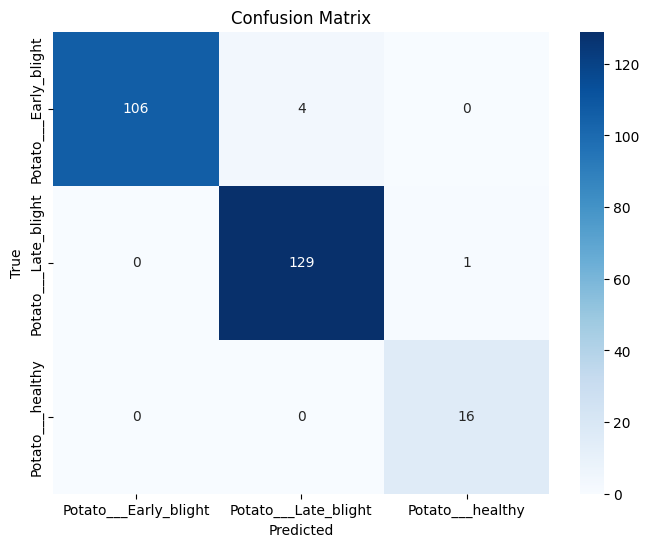

In [2]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# -----------------------------------------------------------
# GET TRUE LABELS & PRED LABELS FROM test_ds
# -----------------------------------------------------------
y_true = []
y_pred = []

for imgs, labels in test_ds:
    preds = model.predict(imgs)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# -----------------------------------------------------------
# ACCURACY
# -----------------------------------------------------------
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true, y_pred)
print(f"Overall Test Accuracy: {acc*100:.2f}%")

# -----------------------------------------------------------
# CLASSIFICATION REPORT
# -----------------------------------------------------------
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# -----------------------------------------------------------
# CONFUSION MATRIX
# -----------------------------------------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
